# **Upload libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1- **Upload the data**

In [ ]:
path = 'Funda_dataset_cleaned.csv'

data = pd.read_csv(path)


,Aangeboden sinds,Verkoopdatum,Laatste vraagprijs,Status,Soort bouw,Aantal kamers,Energielabel,Overige inpandige ruimte m2,Perceel m2,Achtertuin m2,...,Soort garage_Parkeerkelder,Soort garage_Garagebox,Soort garage_Aangebouwdestenen garage,Soort garage_Carport,Soort garage_Vrijstaandestenen garage,Soort garage_Vrijstaandehouten garage,Soort garage_Garagemet carport,Soort garage_Souterrain,Soort dak,Soort woonhuis
0,2022-05-19,2023-03-10,485000,Verkocht,Nieuwbouw,5,A,18,263,120,...,0,0,0,0,0,0,0,0,Zadeldak bedekt met pannen,"Eengezinswoning, 2-onder-1-kapwoning"
1,2022-09-26,2023-06-22,375000,Verkocht,Nieuwbouw,5,A+++,0,198,60,...,0,0,0,0,0,0,0,0,Zadeldak bedekt met pannen,"Eengezinswoning, hoekwoning"
2,2023-01-25,2023-05-18,279500,Verkocht,Nieuwbouw,3,None,4,128,68,...,0,0,0,0,0,0,0,0,Lessenaardak bedekt met pannen,"Eengezinswoning, tussenwoning"
3,2022-12-02,2023-05-09,2330000,Verkocht,Nieuwbouw,8,None,0,2479,2172,...,0,0,0,0,0,0,0,0,Samengesteld dak bedekt met bitumineuze dakbed...,"Villa, vrijstaande woning"
4,2022-12-02,2023-05-15,2270000,Verkocht,Nieuwbouw,8,None,0,1796,1489,...,0,0,0,0,0,0,0,0,Samengesteld dak bedekt met bitumineuze dakbed...,"Villa, vrijstaande woning"


In [ ]:

num_duplicates = data.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

data.drop_duplicates(inplace=True)

Number of duplicate rows: 13


# Drop time variables

In [ ]:
data.drop(['Aangeboden sinds', 'Verkoopdatum'], axis=1, inplace=True)

In [ ]:
data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')

<ipython-input-24-855a70a2f4ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')


Woonruimte in m2                            0.680477
Inhoud in m3                                0.587934
Bathrooms                                   0.474886
Vraagprijs per m2                           0.470889
Aantal kamers                               0.403485
                                              ...   
Schuur/berging_Box                         -0.053630
Isolatie_Geenisolatie                      -0.061635
Voorzieningen_Tvkabel                      -0.077961
Schuur/berging_Vrijstaandestenen berging   -0.094548
Verwarming_Blokverwarming                  -0.136348
Name: Laatste vraagprijs, Length: 103, dtype: float64

In [ ]:
cor=data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')

<ipython-input-25-1875e60eb14e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')


# Drop less than 0.1 correlated

<ipython-input-27-637a3d481950>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()
<ipython-input-27-637a3d481950>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.bar(x=list(data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs').index), height=list(data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs').values), color='teal')
<ipython-input-27-637a3d481950>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only

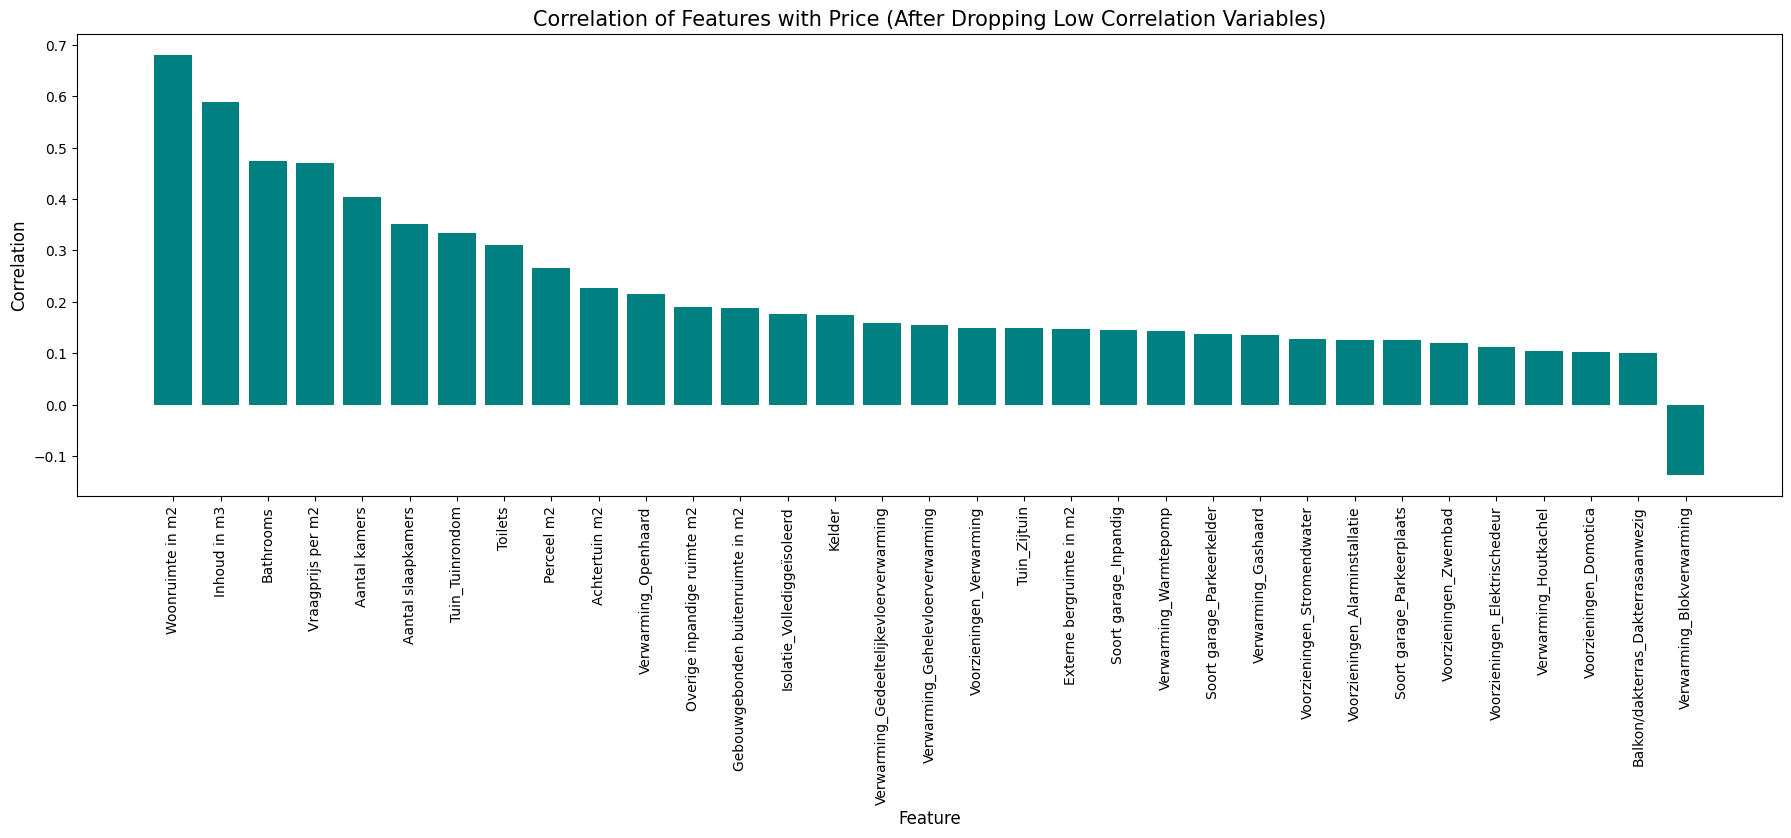

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Select the variables that have a correlation less than 0.1 with the target variable
drop_list = corr_matrix[corr_matrix['Laatste vraagprijs'].abs() < 0.1].index.to_list()

# Drop the variables from the data
data = data.drop(drop_list, axis=1)

# Plot the correlation matrix of the remaining variables
plt.figure(figsize=(22,6))
plt.bar(x=list(data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs').index), height=list(data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs').values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price (After Dropping Low Correlation Variables)', fontsize=15)
plt.show()

In [ ]:
data.shape

(9871, 40)

# **Split the Target variable from the input variables**

In [ ]:
X = data.drop('Laatste vraagprijs',axis=1)
y = data['Laatste vraagprijs']

X.head()
X.describe()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9871 entries, 0 to 9883
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Status                                   9871 non-null   object
 1   Soort bouw                               9871 non-null   object
 2   Aantal kamers                            9871 non-null   int64 
 3   Energielabel                             9871 non-null   object
 4   Overige inpandige ruimte m2              9871 non-null   int64 
 5   Perceel m2                               9871 non-null   int64 
 6   Achtertuin m2                            9871 non-null   int64 
 7   Aantal dagen tot verkoop                 9871 non-null   object
 8   Vraagprijs per m2                        9871 non-null   int64 
 9   Woonruimte in m2                         9871 non-null   int64 
 10  Gebouwgebonden buitenruimte in m2        9871 non-null   int

# **Split the data into Train and Test**

In [ ]:
# Split the data into training and testing sets
X_train_full, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Transform Categorical variables by encoding**

In [ ]:
from sklearn.preprocessing import StandardScaler

#   transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Select categorical columns with fewer than 1000 unique values
categorical_col = [col for col in X_train_full.columns if X_train_full[col].dtype == 'O' and X_train_full[col].nunique() < 1000]
# Print the selected categorical columns
print("Categorical Columns:")
print(categorical_col)

# Select numerical columns
numerical_col = [col for col in X_train_full.columns if X_train_full[col].dtype in ['float64', 'int64']]
# Print the selected numerical columns
print("Numerical Columns:")
print(numerical_col)

# Combine selected categorical and numerical columns
my_cols = categorical_col + numerical_col
# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_col),
    ('cat', categorical_transformer, categorical_col)])


eval_set_pipe = Pipeline([
    ('preprocessor', preprocessor)
])

Categorical Columns:
['Status', 'Soort bouw', 'Energielabel', 'Aantal dagen tot verkoop', 'Soort dak', 'Soort woonhuis']
Numerical Columns:
['Aantal kamers', 'Overige inpandige ruimte m2', 'Perceel m2', 'Achtertuin m2', 'Vraagprijs per m2', 'Woonruimte in m2', 'Gebouwgebonden buitenruimte in m2', 'Externe bergruimte in m2', 'Inhoud in m3', 'Aantal slaapkamers', 'Bathrooms', 'Toilets', 'Kelder', 'Voorzieningen_Domotica', 'Voorzieningen_Zwembad', 'Voorzieningen_Verwarming', 'Voorzieningen_Stromendwater', 'Voorzieningen_Elektrischedeur', 'Voorzieningen_Alarminstallatie', 'Isolatie_Vollediggeïsoleerd', 'Verwarming_Gedeeltelijkevloerverwarming', 'Verwarming_Warmtepomp', 'Verwarming_Gehelevloerverwarming', 'Verwarming_Blokverwarming', 'Verwarming_Gashaard', 'Verwarming_Openhaard', 'Verwarming_Houtkachel', 'Balkon/dakterras_Dakterrasaanwezig', 'Tuin_Zijtuin', 'Tuin_Tuinrondom', 'Soort garage_Parkeerplaats', 'Soort garage_Inpandig', 'Soort garage_Parkeerkelder']


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

# Set the scaling type directly to "robust"
scaling_type = "robust"

if scaling_type == "standard":
    numerical_transformer.steps.append(('scaler', StandardScaler()))
elif scaling_type == "minmax":
    numerical_transformer.steps.append(('scaler', MinMaxScaler()))
elif scaling_type == "robust":
    numerical_transformer.steps.append(('scaler', RobustScaler()))
else:
    raise ValueError("Invalid scaling type: {}".format(scaling_type))

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Select categorical columns with fewer than 1000 unique values
categorical_col = [col for col in X_train_full.columns if X_train_full[col].dtype == 'O' and X_train_full[col].nunique() < 1000]
# Print the selected categorical columns
print("Categorical Columns:")
print(categorical_col)

# Select numerical columns
numerical_col = [col for col in X_train_full.columns if X_train_full[col].dtype in ['float64', 'int64']]
# Print the selected numerical columns
print("Numerical Columns:")
print(numerical_col)

# Combine selected categorical and numerical columns
my_cols = categorical_col + numerical_col
# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_col),
    ('cat', categorical_transformer, categorical_col)
])


eval_set_pipe = Pipeline([
    ('preprocessor', preprocessor)
])




Enter the desired scaling type (standard, minmax, robust): robust
Categorical Columns:
['Status', 'Soort bouw', 'Energielabel', 'Aantal dagen tot verkoop', 'Soort dak', 'Soort woonhuis']
Numerical Columns:
['Aantal kamers', 'Overige inpandige ruimte m2', 'Perceel m2', 'Achtertuin m2', 'Vraagprijs per m2', 'Woonruimte in m2', 'Gebouwgebonden buitenruimte in m2', 'Externe bergruimte in m2', 'Inhoud in m3', 'Aantal slaapkamers', 'Bathrooms', 'Toilets', 'Kelder', 'Voorzieningen_Domotica', 'Voorzieningen_Zwembad', 'Voorzieningen_Verwarming', 'Voorzieningen_Stromendwater', 'Voorzieningen_Elektrischedeur', 'Voorzieningen_Alarminstallatie', 'Isolatie_Vollediggeïsoleerd', 'Verwarming_Gedeeltelijkevloerverwarming', 'Verwarming_Warmtepomp', 'Verwarming_Gehelevloerverwarming', 'Verwarming_Blokverwarming', 'Verwarming_Gashaard', 'Verwarming_Openhaard', 'Verwarming_Houtkachel', 'Balkon/dakterras_Dakterrasaanwezig', 'Tuin_Zijtuin', 'Tuin_Tuinrondom', 'Soort garage_Parkeerplaats', 'Soort garage_Inpand

# **Define the eval_set_pipe with the preprocessor**

In [ ]:

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_col),
 ('cat', categorical_transformer, categorical_col)])


eval_set_pipe = Pipeline([
    ('preprocessor', preprocessor)
])

# **Transform X_train and X_test without eval_set_pipe**

In [ ]:

# Transform X_train and X_test without eval_set_pipe
X_train_eval = X_train_full[my_cols]
X_test_eval = X_test[my_cols]


# Convert the original data to DataFrames with the original index (no transformation)
X_train_eval_df = pd.DataFrame(X_train_eval, index=X_train_full.index)
X_test_eval_df = pd.DataFrame(X_test_eval, index=X_test.index)
X_test_eval_df.head()

,Status,Soort bouw,Energielabel,Aantal dagen tot verkoop,Soort dak,Soort woonhuis,Aantal kamers,Overige inpandige ruimte m2,Perceel m2,Achtertuin m2,...,Verwarming_Blokverwarming,Verwarming_Gashaard,Verwarming_Openhaard,Verwarming_Houtkachel,Balkon/dakterras_Dakterrasaanwezig,Tuin_Zijtuin,Tuin_Tuinrondom,Soort garage_Parkeerplaats,Soort garage_Inpandig,Soort garage_Parkeerkelder
6209,Verkocht,Bestaande bouw,B,29 days,Zadeldak bedekt met pannen,"Eengezinswoning, 2-onder-1-kapwoning",5,12,430,200,...,0,0,0,0,0,0,0,0,0,0
343,Verkocht,Nieuwbouw,None,113 days,Plat dak bedekt met bitumineuze dakbedekking,"Herenhuis, 2-onder-1-kapwoning",2,0,48,0,...,0,0,0,0,0,0,0,0,0,0
9788,Verkocht,Bestaande bouw,C,28 days,Plat dak bedekt met bitumineuze dakbedekking,"Eengezinswoning, hoekwoning (hofjeswoning)",6,0,97,0,...,0,0,0,0,0,0,0,0,0,0
3056,Verkocht,Bestaande bouw,B,14 days,Dwarskap bedekt met pannen,"Eengezinswoning, tussenwoning",5,0,122,58,...,0,0,0,0,0,0,0,0,0,0
6513,Verkocht,Bestaande bouw,F,26 days,Plat dak bedekt met bitumineuze dakbedekking,"Eengezinswoning, tussenwoning (hofjeswoning)",3,0,71,0,...,0,0,0,0,0,0,0,0,0,0


# **Transform X_train and X_test using eval_set_pipe**

In [ ]:
# Create a DataFrame with column names
column_names_df = pd.DataFrame([X_train_full[my_cols].columns])

# Transform X_train and X_test using eval_set_pipe
X_train_eval = eval_set_pipe.fit_transform(X_train_full[my_cols])
X_test_eval = eval_set_pipe.transform(X_test[my_cols])

# Convert the transformed data to DataFrames with the original index
X_train_eval_df = pd.DataFrame(X_train_eval, index=X_train_full.index)
X_test_eval_df = pd.DataFrame(X_test_eval, index=X_test.index)



X_test_eval_df

,0
6209,"(0, 1)\t1.2\n (0, 2)\t1.6787878787878787\n ..."
343,"(0, 0)\t-3.0\n (0, 2)\t-0.6363636363636364\..."
9788,"(0, 0)\t1.0\n (0, 2)\t-0.3393939393939394\n..."
3056,"(0, 2)\t-0.18787878787878787\n (0, 3)\t0.00..."
6513,"(0, 0)\t-2.0\n (0, 2)\t-0.49696969696969695..."
...,...
6096,"(0, 2)\t-0.1696969696969697\n (0, 3)\t-0.54..."
9380,"(0, 0)\t-2.0\n (0, 2)\t-0.4727272727272727\..."
3450,"(0, 0)\t-1.0\n (0, 2)\t2.109090909090909\n ..."
1970,"(0, 2)\t-0.11515151515151516\n (0, 3)\t-0.5..."


# **XGBoost Parameters**

In [ ]:
my_model = XGBRegressor(n_estimators=1500, learning_rate=0.01, n_jobs=6)

# **Train the XGBoost model**

In [ ]:

my_model.fit(X_train_eval, y_train, early_stopping_rounds=60, eval_set=[(X_test_eval, y_test)], verbose=False)

# Make predictions on the test set
y_test_pred = my_model.predict(X_test_eval)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


# **Calculate various accuracy measures**

In [ ]:
# Calculate various accuracy measures
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the accuracy measures
from sklearn import metrics
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,y_test_pred))


print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


R2 Score_XGBoost Regression= 0.9946705196578388
Mean Squared Error (MSE): 230836225.24853337
Root Mean Squared Error (RMSE): 15193.295404504363
Mean Absolute Error (MAE): 4930.160688291139
Mean Absolute Percentage Error (MAPE): 1.0589857190687415 %


# **1- Feature Importance Analysis**


In [ ]:
import plotly.graph_objects as go

feat_importances = my_model.feature_importances_[:39]
indices = np.argsort(feat_importances)

# Create a bar plot using plotly
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=feat_importances[indices],
        y=X_train_full[my_cols].columns,
        orientation='h',
        marker=dict(
            color=feat_importances[indices],
            colorscale='Viridis',  # You can choose another colorscale
            cmin=min(feat_importances),
            cmax=max(feat_importances),
            colorbar=dict(title='Feature Importance'),
        ),
        text=feat_importances[indices],  # Display the feature importance values on hover
        hoverinfo='text+x+y',  # Display text, x-axis, and y-axis values on hover
    )
)

fig.update_layout(
    title="Feature Importances - XGBoost Regressor",
    xaxis_title='Feature Importance',
    yaxis_title='Feature Name',
    height=600,
    width=1400,
)

fig.show()


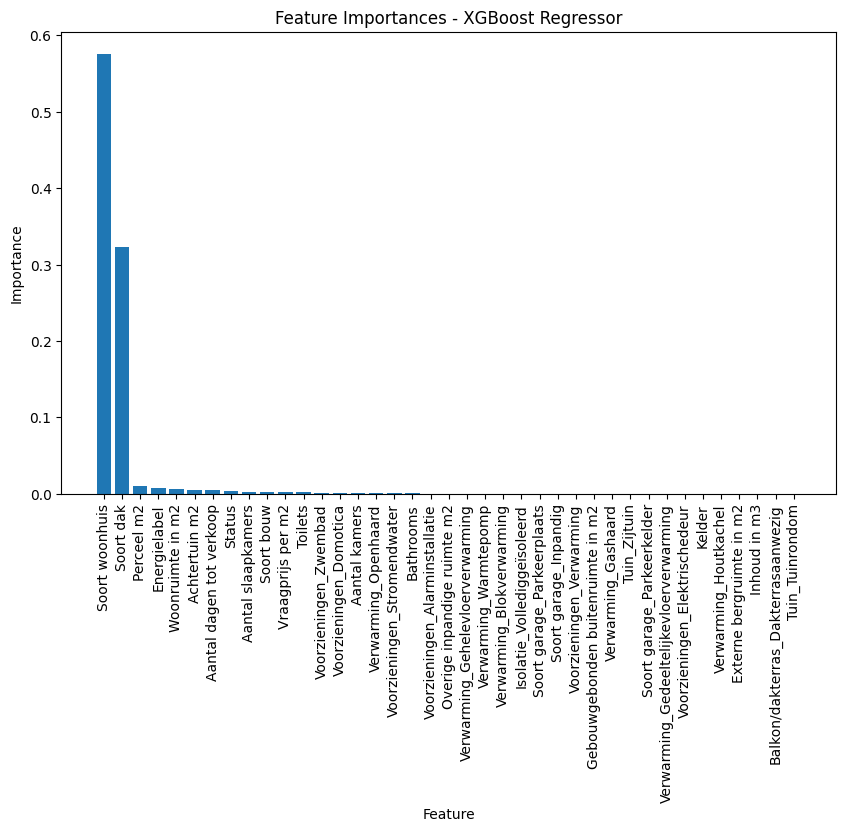

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming my_model is an instance of XGBRegressor
feat_importances = my_model.feature_importances_[:39]  # Take only the first 39 feature importances
feature_names = X_test[my_cols].columns  # Replace with the actual feature names

# Sort feature importances in descending order and get the corresponding indices
indices = feat_importances.argsort()[::-1]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), feat_importances[indices], align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - XGBoost Regressor')
plt.show()


# **2- Shows error patterns**

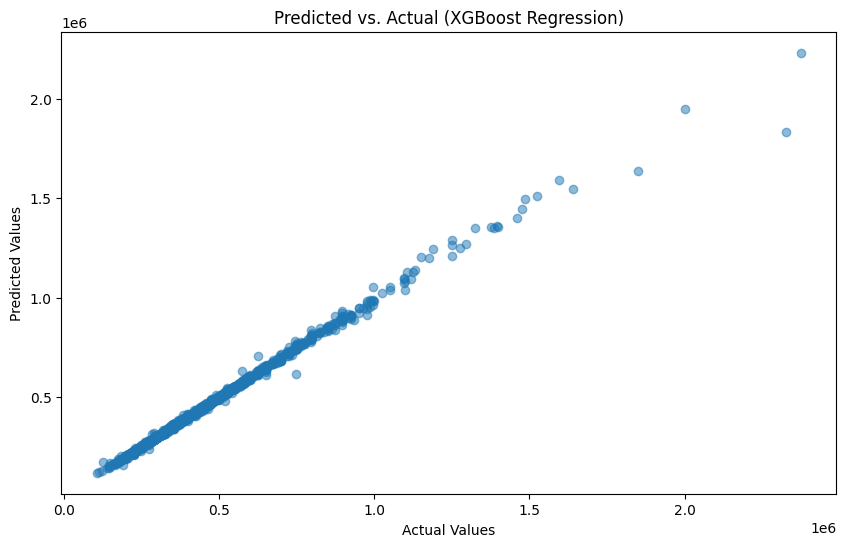

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_actual contains the actual values and y_test_pred contains the predicted values
y_test_actual = y_test  
y_test_pred = y_test_pred    

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_test_pred, alpha=0.5)
plt.title('Predicted vs. Actual (XGBoost Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# **2- Shows error patterns (e.g.confusion matrices)**

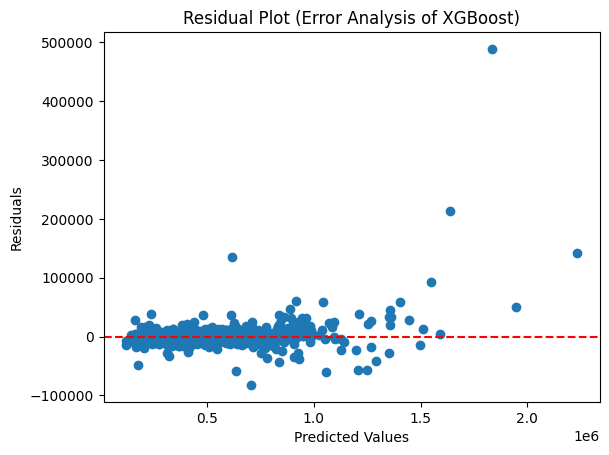

In [ ]:
residuals = y_test - y_test_pred

plt.scatter(y_test_pred, residuals)
plt.title('Residual Plot (Error Analysis of XGBoost)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


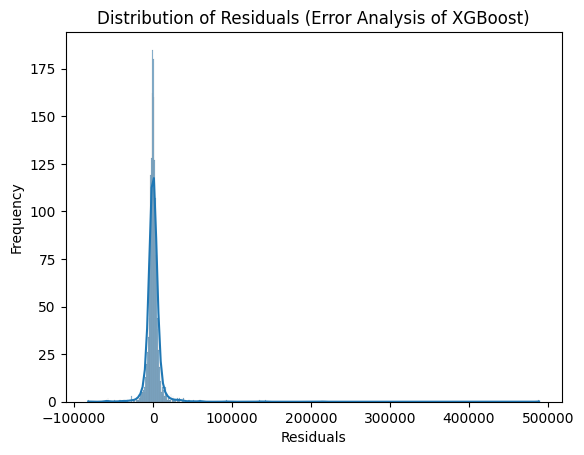

In [ ]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Error Analysis of XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


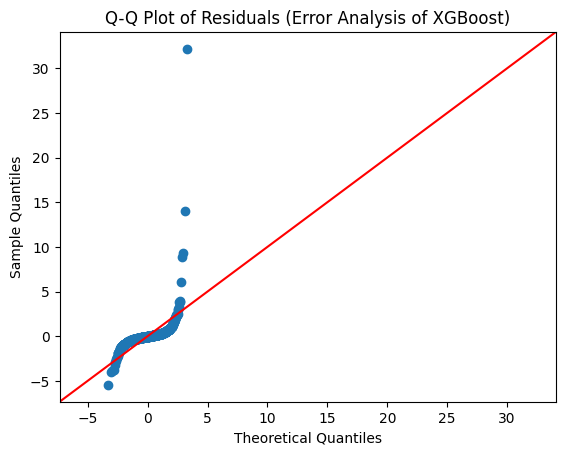

In [ ]:
import statsmodels.api as sm

residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)

sm.qqplot(residuals_standardized, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Error Analysis of XGBoost)')
plt.show()